In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matpoltlib inline

UsageError: Line magic function `%matpoltlib` not found.


In [2]:
df = pd.DataFrame(columns=('x','y'))

In [3]:
df.loc[0] =[7,1]
df.loc[1] =[2,1]
df.loc[2] =[4,2]
df.loc[3] =[9,4]
df.loc[4] =[10,5]
df.loc[5] =[10,6]
df.loc[6] =[11,5]
df.loc[7] =[11,6]
df.loc[8] =[15,3]
df.loc[9] =[15,2]
df.loc[10] =[16,4]
df.loc[11] =[15,1]


In [4]:
data_points =df.values
kmeans = KMeans(n_clusters=3).fit(data_points)
kmeans.labels_


array([0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1])

In [5]:
df['cluster_id']= kmeans.labels_
df

,x,y,cluster_id
0,7,1,0
1,2,1,0
2,4,2,0
3,9,4,2
4,10,5,2
5,10,6,2
6,11,5,2
7,11,6,2
8,15,3,1
9,15,2,1


Text(0.5, 1, 'kmean plot')

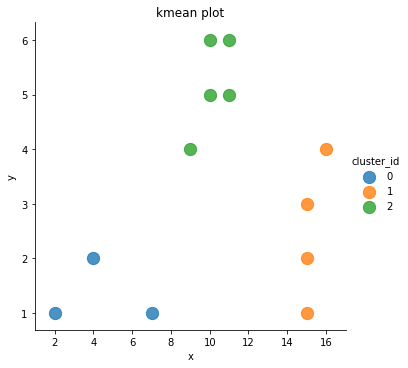

In [6]:
sns.lmplot('x','y',data=df, fit_reg=False,
            scatter_kws={"s":150},
          hue="cluster_id")

plt.title("kmean plot")

In [7]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']
data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
feature = data[ ['Sepal length','Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [9]:

from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

print(r)

     Sepal length  Sepal width  predict
0             5.1          3.5        0
1             4.9          3.0        0
2             4.7          3.2        0
3             4.6          3.1        0
4             5.0          3.6        0
..            ...          ...      ...
145           6.7          3.0        1
146           6.3          2.5        2
147           6.5          3.0        1
148           6.2          3.4        1
149           5.9          3.0        2

[150 rows x 3 columns]


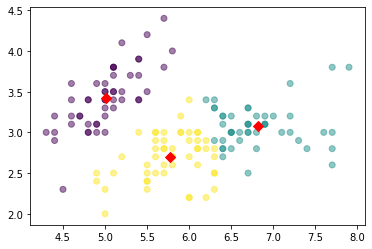

In [10]:

centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [11]:

ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict   0   1   2
labels             
0        50   0   0
1         0  12  38
2         0  35  15


In [12]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model)
pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([feature,predict],axis=1)

ct = pd.crosstab(data['labels'],r['predict'])
print (ct)

predict   0   1   2
labels             
0         1  49   0
1        35   0  15
2        16   0  34


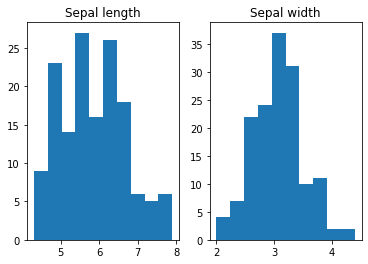

In [13]:
import matplotlib.pyplot  as plt

plt.subplot(1,2,1)
plt.hist(data['Sepal length'])
plt.title('Sepal length')
plt.subplot(1,2,2)
plt.hist(data['Sepal width'])
plt.title('Sepal width')
plt.show()

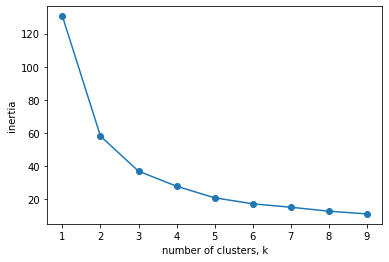

In [14]:

ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()